In [1]:
X = [1000, 1500, 1200]
Y = [20, 35, 30]

In [2]:
import sympy as sp

In [3]:
a, b = sp.symbols("a b")

In [4]:
sum = 0
for x,y in zip(X,Y):
    sum += (a*x+b -y)**2

In [5]:
sum

(1000*a + b - 20)**2 + (1200*a + b - 30)**2 + (1500*a + b - 35)**2

In [6]:
sp.simplify(sum)

4690000*a**2 + 7400*a*b - 217000*a + 3*b**2 - 170*b + 2525

In [7]:
sp.diff(sum,a)

9380000*a + 7400*b - 217000

In [8]:
sp.diff(sum, b)

7400*a + 6*b - 170

In [9]:
import numpy as np

In [10]:
X = np.linspace(-20, 20, 101)

In [18]:
Y = 3*X+5 + np.random.randn(101)*10

In [19]:
import matplotlib.pyplot as plt

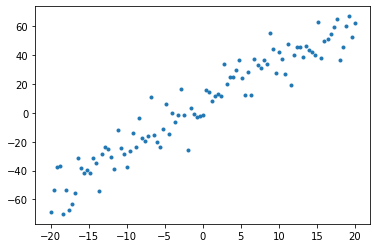

In [20]:
plt.plot(X, Y, ".")

In [25]:
A = np.vstack([X, np.ones_like(X)]).T

In [28]:
ATA = A.T@A
ATA

array([[1.37360000e+04, 4.26325641e-14],
       [4.26325641e-14, 1.01000000e+02]])

In [30]:
ATY = A.T@Y
ATY

array([40854.84453733,   558.72861271])

In [32]:
theta = np.linalg.solve(ATA, ATY)
theta

array([2.97428979, 5.53196646])

In [33]:
a, b = theta

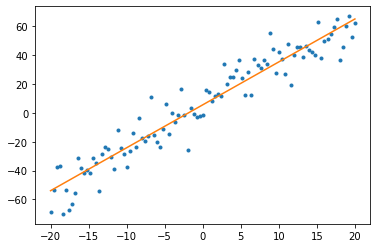

In [34]:
plt.plot(X, Y, ".")
plt.plot(X, a*X+b)

In [39]:
Y = 0.5*X**2+5*X-4 + np.random.randn(101)*100

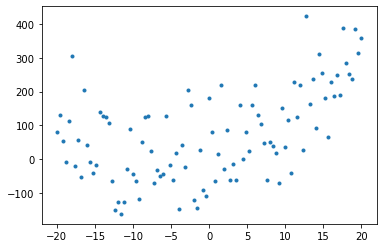

In [40]:
plt.plot(X, Y, ".")

In [41]:
A = np.vstack([X**2, X, X**0]).T
A

array([[ 4.0000e+02, -2.0000e+01,  1.0000e+00],
       [ 3.8416e+02, -1.9600e+01,  1.0000e+00],
       [ 3.6864e+02, -1.9200e+01,  1.0000e+00],
       [ 3.5344e+02, -1.8800e+01,  1.0000e+00],
       [ 3.3856e+02, -1.8400e+01,  1.0000e+00],
       [ 3.2400e+02, -1.8000e+01,  1.0000e+00],
       [ 3.0976e+02, -1.7600e+01,  1.0000e+00],
       [ 2.9584e+02, -1.7200e+01,  1.0000e+00],
       [ 2.8224e+02, -1.6800e+01,  1.0000e+00],
       [ 2.6896e+02, -1.6400e+01,  1.0000e+00],
       [ 2.5600e+02, -1.6000e+01,  1.0000e+00],
       [ 2.4336e+02, -1.5600e+01,  1.0000e+00],
       [ 2.3104e+02, -1.5200e+01,  1.0000e+00],
       [ 2.1904e+02, -1.4800e+01,  1.0000e+00],
       [ 2.0736e+02, -1.4400e+01,  1.0000e+00],
       [ 1.9600e+02, -1.4000e+01,  1.0000e+00],
       [ 1.8496e+02, -1.3600e+01,  1.0000e+00],
       [ 1.7424e+02, -1.3200e+01,  1.0000e+00],
       [ 1.6384e+02, -1.2800e+01,  1.0000e+00],
       [ 1.5376e+02, -1.2400e+01,  1.0000e+00],
       [ 1.4400e+02, -1.2000e+01,  1.000

In [42]:
theta = np.linalg.solve(A.T@A, A.T@Y)

In [43]:
a, b, c = theta

In [44]:
theta

array([0.51438089, 5.79332806, 4.18597809])

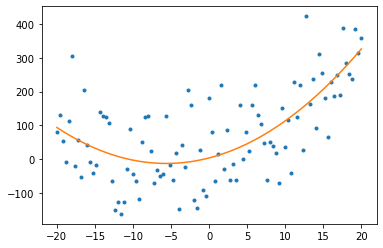

In [45]:
plt.plot(X, Y, ".")
plt.plot(X, a*X**2+b*X+c)

In [56]:
def regression(X, Y, n):
    A = [X**i for i in range(n, -1, -1)]
    A = np.vstack(A).T
    theta = np.linalg.solve(A.T@A,A.T@Y)
    return theta

In [62]:
theta = regression(X, Y, 3)
theta

array([-8.39306830e-04,  5.14380893e-01,  5.99876351e+00,  4.18597809e+00])

In [63]:
def predict(X, theta):
    n = len(theta)

    sum = np.zeros_like(X, dtype=float)
    for i in range(n):
        j = n - i -1
        sum += theta[i]*X**j

    return sum

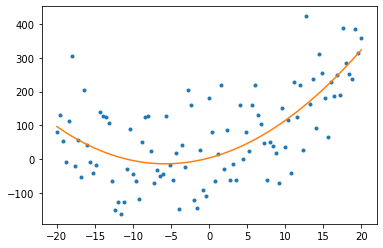

In [64]:
plt.plot(X, Y, ".")
plt.plot(X, predict(X, theta))


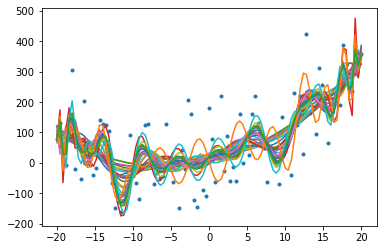

In [73]:
plt.plot(X, Y, ".")
for n in range(2, 44):
    theta = regression(X, Y, n)
    Y_hat = predict(X, theta)
    plt.plot(X, Y_hat)